<a href="https://colab.research.google.com/github/sangjin94/SQL_ITWILL/blob/main/da15_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# 데이터 파일들이 저장된 경로
movies_file='https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/movies.dat'
ratings_file='https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/ratings.dat'
users_file='https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/users.dat'


각 파일을 읽고 데이터 프레임 3개를 생성.

In [ ]:
# 데이터 프레임의 컬럼 이름들
movies_col=['movie_id','title','genres']
ratings_col=['user_id','movie_id','rating','timestamp']
user_col=['user_id','gender','age','occupation','zip_code']

In [ ]:
movies=pd.read_csv(movies_file,sep='::',engine='python',encoding='cp1252',names=movies_col)
ratings=pd.read_csv(ratings_file,sep='::',engine='python',names=ratings_col)
users=pd.read_csv(users_file,sep='::',engine='python',names=user_col)

In [ ]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
users

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [ ]:
total_df=movies.merge(ratings).merge(users)
total_df

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


데이터 프레임 탐색

In [ ]:
# 숫자 타입 변수의 기술 통계량 
total_df.describe()

,movie_id,user_id,rating,timestamp,age,occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.096041e+03,1.728413e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.030000e+03,1.506000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,1.835000e+03,3.070000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,2.770000e+03,4.476000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,3.952000e+03,6.040000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


In [ ]:
# 다른 이름의 영화 제목 개수- movies 에는 rating에 없는 영화들(사용자평점이 없는 영화들)이 있었다.
len(total_df['title'].unique())

3706

In [ ]:
#영화 평점의 개수(빈도수)
rating_count=total_df['rating'].value_counts()
rating_count

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64

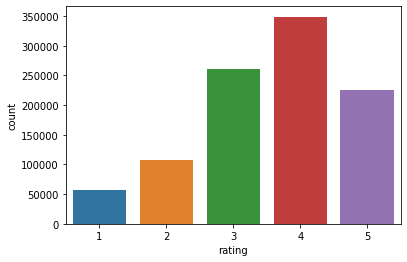

In [ ]:
sns.barplot(x=rating_count.index,y=rating_count.values)
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

In [ ]:
# 연령대 빈도수
age_counts=total_df['age'].value_counts()
age_counts

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: age, dtype: int64

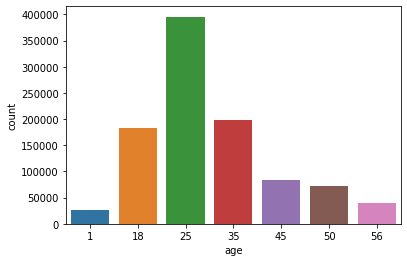

In [ ]:
sns.barplot(x=age_counts.index,y=age_counts.values)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

In [ ]:
# 사용자 성비
gender_counts= total_df['gender'].value_counts()
gender_counts

M    753769
F    246440
Name: gender, dtype: int64

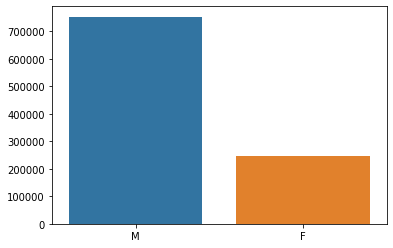

In [ ]:
sns.barplot(x=gender_counts.index,y=gender_counts.values)
plt.show()

In [ ]:
# 직업코드 (occupation) 빈도수
occ_counts= total_df['occupation'].value_counts()
occ_counts

4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: occupation, dtype: int64

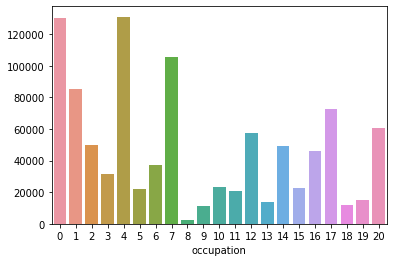

In [ ]:
sns.barplot(x=occ_counts.index,y=occ_counts.values)
plt.xlabel('occupation')
plt.show()

In [ ]:
# 영화 제목별 평점의 평균 
rating_top=total_df.groupby('title')['rating'].mean()
rating_top

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [ ]:
# 제목별 평점 평균 내림차순 정렬
rating_top10=rating_top.sort_values(ascending=False).head(n=10)
rating_top10

title
Gate of Heavenly Peace, The (1995)           5.0
Lured (1947)                                 5.0
Ulysses (Ulisse) (1954)                      5.0
Smashing Time (1967)                         5.0
Follow the Bitch (1998)                      5.0
Song of Freedom (1936)                       5.0
Bittersweet Motel (2000)                     5.0
Baby, The (1973)                             5.0
One Little Indian (1973)                     5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Name: rating, dtype: float64

In [ ]:
# 영화 제목 빈도수, 평점 평균
total_df.groupby('title')['rating'].agg(['count','mean']).sort_values(by='mean',ascending=False)

,count,mean
title,,
Ulysses (Ulisse) (1954),1,5.0
Lured (1947),1,5.0
Follow the Bitch (1998),1,5.0
Bittersweet Motel (2000),1,5.0
Song of Freedom (1936),1,5.0
...,...,...
"Fantastic Night, The (La Nuit Fantastique) (1949)",1,1.0
Cheetah (1989),1,1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973),2,1.0


리뷰 건수가 1개 또는 2개 밖에 없는 영화들의 평점 평균을 계산하는 것은 큰 의미가 없을것 같다. 일정 숫자 이상의 리뷰 건수가 있는 영화들만 선택해서 평점 분석을 하는 것이 더 의미가 있을 것 같다. 

In [ ]:
# 영화 제목별 리뷰 건수 
title_counts=total_df.groupby('title').size()
title_counts

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

In [ ]:
title_counts.describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
dtype: float64

In [ ]:
# 150건 이상의 리뷰를 받은 영화제목
indexer= title_counts[title_counts>=150].index

In [ ]:
len(indexer)

1683

In [ ]:
by_title_150=rating_top.loc[indexer]

In [ ]:
# 150건 이상의 리뷰를 받은 영화들 중 평점 평균 상위 10개 
by_title_150.sort_values(ascending=False).head(10)

title
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Schindler's List (1993)                                                4.510417
Wrong Trousers, The (1993)                                             4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Raiders of the Lost Ark (1981)                                         4.477725
Rear Window (1954)                                                     4.476190
Name: rating, dtype: float64

In [ ]:
# 150건 이상의 리뷰를 받은 영화들 중 평점 평균 하위 10개 
by_title_150.sort_values(ascending=True).head(10)

title
Battlefield Earth (2000)                            1.611111
Baby Geniuses (1999)                                1.701220
Police Academy 5: Assignment: Miami Beach (1988)    1.766667
Stop! Or My Mom Will Shoot (1992)                   1.782123
Jaws 3-D (1983)                                     1.852381
Speed 2: Cruise Control (1997)                      1.871935
Spice World (1997)                                  1.873684
Super Mario Bros. (1993)                            1.874286
Home Alone 3 (1997)                                 1.876623
Superman IV: The Quest for Peace (1987)             1.888554
Name: rating, dtype: float64

In [ ]:
# 150건 이상의 리뷰를 받은 영화들 중에서 성별 영화 평점 평균
total_df.groupby(['title','gender'])['rating'].mean().unstack()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [ ]:
by_gender=total_df.pivot_table(values='rating',index='title',columns='gender')

In [ ]:
by_gender

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [ ]:
by_gender_150 = by_gender.loc[indexer]

In [ ]:
# 남성 평점 평균과 여성 평점 평균의 차이(diff)를 파생 변수로 추가
by_gender_150['diff']= by_gender_150['M']-by_gender_150['F']

In [ ]:
# 여성  평점 상위 10개 영화

In [ ]:
by_gender_150.sort_values(by='F',ascending=False).head(10)

gender,F,M,diff
title,,,
"Close Shave, A (1995)",4.644444,4.473795,-0.170650
"Wrong Trousers, The (1993)",4.588235,4.478261,-0.109974
"General, The (1927)",4.575758,4.329480,-0.246278
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589,-0.108060
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075,-0.178032
Schindler's List (1993),4.562602,4.491415,-0.071187
"Grand Illusion (Grande illusion, La) (1937)",4.560976,4.266129,-0.294847
"Shawshank Redemption, The (1994)",4.539075,4.560625,0.021550
"Grand Day Out, A (1992)",4.537879,4.293255,-0.244624


In [ ]:
# 남성  평점 상위 10개 영화

In [ ]:
by_gender_150.sort_values(by='M',ascending=False).head(10)

gender,F,M,diff
title,,,
"Godfather, The (1972)",4.314700,4.583333,0.268634
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628,0.095496
"Shawshank Redemption, The (1994)",4.539075,4.560625,0.021550
Raiders of the Lost Ark (1981),4.332168,4.520597,0.188429
"Usual Suspects, The (1995)",4.513317,4.518248,0.004931
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307,0.192371
Schindler's List (1993),4.562602,4.491415,-0.071187
Paths of Glory (1957),4.392857,4.485149,0.092291
"Wrong Trousers, The (1993)",4.588235,4.478261,-0.109974


남녀 평점의 차이가 큰 영화 - 남녀 선호도가 차이나는 영화

* 여성 평점 평균이 높은 경우
* 남성 평점 평균이 높은 경

In [ ]:
# 150건 이상의 리뷰를 받은 영화들 중에서 여성들의 평점이 남성에 비해서 높은 영화 상위 10개
# ascending=True 생략 -> 오름차순 정렬 -> 작은 숫자부터 큰 숫자 순으로 정렬
by_gender_150.sort_values(by='diff').head(n=10)

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Home Alone 3 (1997),2.486486,1.683761,-0.802726
"To Wong Foo, Thanks for Everything! Julie Newmar (1995)",3.486842,2.795276,-0.691567
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Dracula: Dead and Loving It (1995),2.892857,2.250000,-0.642857
Grease (1978),3.975265,3.367041,-0.608224
Police Academy 4: Citizens on Patrol (1987),2.406250,1.802817,-0.603433
Brokedown Palace (1999),3.312500,2.723577,-0.588923
"Relic, The (1997)",3.309524,2.723077,-0.586447


In [ ]:
# 150건 이상의 리뷰를 받은 영화들 중에서 남성들의 평점이 여성에 비해서 높은 영화 상위 10개
by_gender_150.sort_values(by='diff',ascending=False).head(n=10)

gender,F,M,diff
title,,,
Lifeforce (1985),2.250000,2.994152,0.744152
Quest for Fire (1981),2.578947,3.309677,0.730730
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
No Escape (1994),2.300000,2.994048,0.694048
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Tora! Tora! Tora! (1970),3.090909,3.737705,0.646796
Up in Smoke (1978),2.944444,3.585227,0.640783
Dumb & Dumber (1994),2.697987,3.336595,0.638608
Friday the 13th: The Final Chapter (1984),1.636364,2.258503,0.622140


성별과 상관없이, 영화의 선호도가 차이가 큰 영화들 - 평점 표준편차

In [ ]:
#영화 제목별 평점평균, 표준편차
by_title= total_df.groupby('title')['rating'].agg(['mean','std'])

In [ ]:
by_title

,mean,std
title,,
"$1,000,000 Duck (1971)",3.027027,1.092563
'Night Mother (1986),3.371429,1.118636
'Til There Was You (1997),2.692308,1.020159
"'burbs, The (1989)",2.910891,1.107760
...And Justice for All (1979),3.713568,0.878110
...,...,...
"Zed & Two Noughts, A (1985)",3.413793,1.052794
Zero Effect (1998),3.750831,1.042932
Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000,0.707107


In [ ]:
by_title_150 = by_title.loc[indexer]

In [ ]:
by_title_150

,mean,std
title,,
"'burbs, The (1989)",2.910891,1.107760
...And Justice for All (1979),3.713568,0.878110
10 Things I Hate About You (1999),3.422857,0.989815
101 Dalmatians (1961),3.596460,0.982103
101 Dalmatians (1996),3.046703,1.098717
...,...,...
Young Guns (1988),3.418149,1.017437
Young Guns II (1990),2.907859,1.071959
Young Sherlock Holmes (1985),3.390501,0.891176


In [ ]:
# 표준편차 내림차순 정렬
by_title_150.sort_values(by='std',ascending=False)

,mean,std
title,,
Plan 9 from Outer Space (1958),2.634538,1.455998
"Texas Chainsaw Massacre, The (1974)",3.222672,1.332448
Dumb & Dumber (1994),3.192424,1.321333
"Blair Witch Project, The (1999)",3.031528,1.316368
Natural Born Killers (1994),3.144286,1.307198
...,...,...
"Wrong Trousers, The (1993)",4.507937,0.708666
"Shawshank Redemption, The (1994)",4.554558,0.700443
"Great Escape, The (1963)",4.376437,0.692585


In [ ]:
df= total_df

In [ ]:
# 선호도 차이가 적은 영화 - 평점 평균 표준편차가 작은 영화 

In [ ]:
df.loc[df.title=='Plan 9 from Outer Space (1958)','rating'].describe()

count    249.000000
mean       2.634538
std        1.455998
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

In [ ]:
# movies 데이터 프레임에서 title 컬럼을 인덱스로 변환
movies_with_idx=movies.set_index('title')

In [ ]:
movies_with_idx.loc[indexer] # 150건 이상의 리뷰가 있는 영화들 

,movie_id,genres
title,,
"'burbs, The (1989)",2072,Comedy
...And Justice for All (1979),3420,Drama|Thriller
10 Things I Hate About You (1999),2572,Comedy|Romance
101 Dalmatians (1961),2085,Animation|Children's
101 Dalmatians (1996),1367,Children's|Comedy
...,...,...
Young Guns (1988),1378,Action|Comedy|Western
Young Guns II (1990),1379,Action|Comedy|Western
Young Sherlock Holmes (1985),2414,Action|Adventure|Mystery


* 150건 이상 리뷰를 받은 영화들 중에서,  평점 평균 4.0 이상인 영화들에서 자주 등장하는 영화 장르 상위 10개 

In [ ]:
idx_over4=by_title_150[by_title_150['mean']>=4].index
idx_over4 #> 150건 이상 리뷰를 받은 영화들 중에서, 평점 평균 4.0 이상인 영화 제목들

Index(['12 Angry Men (1957)', '2001: A Space Odyssey (1968)',
       '39 Steps, The (1935)',
       '400 Blows, The (Les Quatre cents coups) (1959)', '8 1/2 (1963)',
       'African Queen, The (1951)', 'Alien (1979)', 'Aliens (1986)',
       'All About Eve (1950)',
       'All About My Mother (Todo Sobre Mi Madre) (1999)',
       ...
       'West Side Story (1961)', 'When Harry Met Sally... (1989)',
       'When We Were Kings (1996)', 'Who's Afraid of Virginia Woolf? (1966)',
       'Wild Bunch, The (1969)',
       'Wings of Desire (Der Himmel über Berlin) (1987)',
       'Wizard of Oz, The (1939)', 'Wrong Trousers, The (1993)',
       'Yojimbo (1961)', 'Young Frankenstein (1974)'],
      dtype='object', name='title', length=283)

In [ ]:
movies_over4= movies_with_idx.loc[idx_over4]
movies_over4

,movie_id,genres
title,,
12 Angry Men (1957),1203,Drama
2001: A Space Odyssey (1968),924,Drama|Mystery|Sci-Fi|Thriller
"39 Steps, The (1935)",965,Thriller
"400 Blows, The (Les Quatre cents coups) (1959)",2731,Drama
8 1/2 (1963),1251,Drama
...,...,...
Wings of Desire (Der Himmel über Berlin) (1987),1211,Comedy|Drama|Romance
"Wizard of Oz, The (1939)",919,Adventure|Children's|Drama|Musical
"Wrong Trousers, The (1993)",1148,Animation|Comedy


In [ ]:
genres_over4=[]
for s in movies_over4['genres']:
  genres_over4.extend(s.split(sep='|'))
  

In [ ]:
genres_over4=pd.Series(genres_over4)

In [ ]:
genres_counts=genres_over4.value_counts().head(10)
genres_counts

Drama        134
Comedy        82
Thriller      51
Romance       38
War           36
Action        36
Crime         26
Mystery       21
Sci-Fi        19
Adventure     17
dtype: int64

Text(0.5, 1.0, 'Genres with mean rating 4.0+')

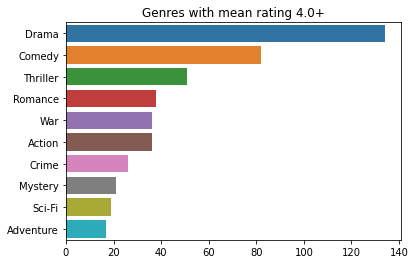

In [ ]:
sns.barplot(x=genres_counts.values,y=genres_counts.index)
plt.title('Genres with mean rating 4.0+')

* 150건 이상 리뷰를 받은 영화들 중에서, 여성 평점 평균 4.0 이상인 영화들에서 자주 등장하는 영화 장르 상위 10개

In [ ]:
idx_female =by_gender_150[by_gender_150['F']>=4.0].index
idx_female

Index(['12 Angry Men (1957)', '400 Blows, The (Les Quatre cents coups) (1959)',
       '8 1/2 (1963)', 'Adventures of Robin Hood, The (1938)',
       'Affair to Remember, An (1957)', 'African Queen, The (1951)',
       'All About Eve (1950)',
       'All About My Mother (Todo Sobre Mi Madre) (1999)',
       'All That Jazz (1979)', 'Almost Famous (2000)',
       ...
       'When We Were Kings (1996)', 'Who's Afraid of Virginia Woolf? (1966)',
       'Willy Wonka and the Chocolate Factory (1971)',
       'Wings of Desire (Der Himmel über Berlin) (1987)', 'Witness (1985)',
       'Wizard of Oz, The (1939)', 'Wonder Boys (2000)',
       'Wrong Trousers, The (1993)', 'Yojimbo (1961)',
       'Young Frankenstein (1974)'],
      dtype='object', name='title', length=279)

In [ ]:
female_movies=movies_with_idx.loc[idx_female]
female_movies # 150건 이상 리뷰를 받은 영화들 중에서 ,여성 평점 평균 4.0 이상인 영화의 장르

,movie_id,genres
title,,
12 Angry Men (1957),1203,Drama
"400 Blows, The (Les Quatre cents coups) (1959)",2731,Drama
8 1/2 (1963),1251,Drama
"Adventures of Robin Hood, The (1938)",940,Action|Adventure
"Affair to Remember, An (1957)",932,Romance
...,...,...
"Wizard of Oz, The (1939)",919,Adventure|Children's|Drama|Musical
Wonder Boys (2000),3317,Comedy|Drama
"Wrong Trousers, The (1993)",1148,Animation|Comedy


In [ ]:
female_genres=[] # 여성 평점 평균 4.0 이상 인 영화들의 장르들을 저장할 리스트
for s in female_movies['genres']:
  female_genres.extend(s.split(sep='|'))

female_genres= pd.Series(female_genres)   # 리스트를 pd.Series 객체로 변환 


In [ ]:
female_genres_counts=female_genres.value_counts().head(10) # 상위 10개 
female_genres_counts

Drama        145
Comedy        82
Romance       47
Thriller      40
War           32
Action        24
Mystery       22
Crime         21
Musical       17
Adventure     15
dtype: int64

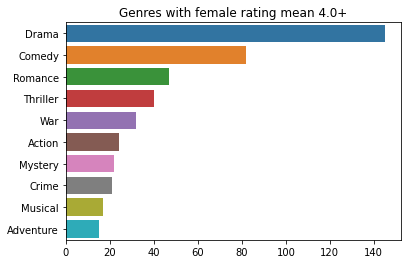

In [ ]:
sns.barplot(x=female_genres_counts.values,y=female_genres_counts.index)
plt.title('Genres with female rating mean 4.0+')
plt.show()

* 150건 이상 리뷰를 받은 영화들 중에서, 남성 평점 평균 4.0 이상인 영화들에서 자주 등장하는 영화 장르 상위 10개

In [ ]:
idx_male =by_gender_150[by_gender_150['M']>=4.0].index
idx_male

Index(['12 Angry Men (1957)', '2001: A Space Odyssey (1968)',
       '39 Steps, The (1935)',
       '400 Blows, The (Les Quatre cents coups) (1959)', '8 1/2 (1963)',
       'African Queen, The (1951)', 'Airplane! (1980)', 'Alien (1979)',
       'Aliens (1986)', 'All About Eve (1950)',
       ...
       'Waiting for Guffman (1996)',
       'Wallace & Gromit: The Best of Aardman Animation (1996)',
       'When We Were Kings (1996)', 'Who's Afraid of Virginia Woolf? (1966)',
       'Wild Bunch, The (1969)',
       'Wings of Desire (Der Himmel über Berlin) (1987)',
       'Wizard of Oz, The (1939)', 'Wrong Trousers, The (1993)',
       'Yojimbo (1961)', 'Young Frankenstein (1974)'],
      dtype='object', name='title', length=278)

In [ ]:
male_movies=movies_with_idx.loc[idx_male]
male_movies # 150건 이상 리뷰를 받은 영화들 중에서 ,남성 평점 평균 4.0 이상인 영화의 장르

,movie_id,genres
title,,
12 Angry Men (1957),1203,Drama
2001: A Space Odyssey (1968),924,Drama|Mystery|Sci-Fi|Thriller
"39 Steps, The (1935)",965,Thriller
"400 Blows, The (Les Quatre cents coups) (1959)",2731,Drama
8 1/2 (1963),1251,Drama
...,...,...
Wings of Desire (Der Himmel über Berlin) (1987),1211,Comedy|Drama|Romance
"Wizard of Oz, The (1939)",919,Adventure|Children's|Drama|Musical
"Wrong Trousers, The (1993)",1148,Animation|Comedy


In [ ]:
male_genres=[] # 남성 평점 평균 4.0 이상 인 영화들의 장르들을 저장할 리스트
for s in male_movies['genres']:
  male_genres.extend(s.split(sep='|'))

male_genres= pd.Series(male_genres)   # 리스트를 pd.Series 객체로 변환 
male_genres

0         Drama
1         Drama
2       Mystery
3        Sci-Fi
4      Thriller
         ...   
511      Comedy
512       Drama
513     Western
514      Comedy
515      Horror
Length: 516, dtype: object

In [ ]:
male_genres_counts=male_genres.value_counts().head(10)
male_genres_counts

Drama        131
Comedy        80
Thriller      49
Action        39
War           36
Romance       32
Crime         26
Mystery       19
Sci-Fi        19
Adventure     17
dtype: int64

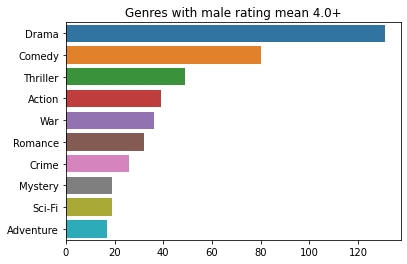

In [ ]:
sns.barplot(x=male_genres_counts.values,y=male_genres_counts.index)
plt.title('Genres with male rating mean 4.0+')
plt.show()

* 150건 이상의 리뷰가 있는 영화들 중에서, 평점의 표준편차가 큰 영화 상위 50개

In [ ]:
std_top_50=by_title_150.sort_values('std',ascending=False).head(50)
std_top_50=std_top_50.index

In [ ]:
std_top_50_genres=movies_with_idx.loc[std_top_50]
std_top_50_genres

,movie_id,genres
title,,
Plan 9 from Outer Space (1958),1924,Horror|Sci-Fi
"Texas Chainsaw Massacre, The (1974)",2459,Horror
Dumb & Dumber (1994),231,Comedy
"Blair Witch Project, The (1999)",2710,Horror
Natural Born Killers (1994),288,Action|Thriller
Idle Hands (1999),2606,Comedy|Horror
Pink Flamingos (1972),2361,Comedy
"Transformers: The Movie, The (1986)",1205,Action|Animation|Children's|Sci-Fi|Thriller|War
Very Bad Things (1998),2387,Comedy|Crime


In [ ]:
std_top_50_list=[]
for s in std_top_50_genres['genres']:
  std_top_50_list.extend(s.split(sep='|'))
top_50_std=pd.Series(std_top_50_list)

In [ ]:
top_50_std=top_50_std.value_counts().head(10)

In [ ]:
top_50_std

Comedy        25
Horror        17
Drama         14
Action        10
Sci-Fi        10
Thriller       6
Musical        4
Children's     4
Animation      3
War            3
dtype: int64

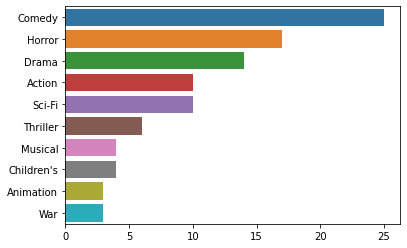

In [ ]:
sns.barplot(x=top_50_std.values
            ,y=top_50_std.index)

* TODO
  * 연령대(age)별 평점 상위 10개 영화 제목
  * 성별 연령대별 평점 평균 상위 영화 제목
  * 직종별 또는 특정 직종의 평점 평균 상위 영화 제목, 장르